<a href="https://colab.research.google.com/github/multimediary/portfolio-data-science/blob/main/rock-paper-scissors-using-tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Library
import tensorflow as tf
import zipfile,os
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [9]:
# Check if the 'tmp' folder exists then delete it
dir_path = '/tmp'
if os.path.exists(dir_path):
  shutil.rmtree(dir_path)
# Then re-create it so that if Runtime All does not have an error
os.mkdir(dir_path)
# Take the dataset from the repository and save it in the / tmp directory, I downloaded the Resources from Dicoding and uploaded it into my personal Github Repo
!wget --no-check-certificate \
  https://github.com/multimediary/dataset/blob/master/rockpaperscissors.zip?raw=true -O /tmp/rockpaperscissors.zip

--2021-04-15 03:59:00--  https://github.com/multimediary/dataset/blob/master/rockpaperscissors.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/multimediary/dataset/raw/master/rockpaperscissors.zip [following]
--2021-04-15 03:59:00--  https://github.com/multimediary/dataset/raw/master/rockpaperscissors.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/multimediary/dataset/master/rockpaperscissors.zip [following]
--2021-04-15 03:59:00--  https://raw.githubusercontent.com/multimediary/dataset/master/rockpaperscissors.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... con

In [10]:
# Zip Extraction
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Check the contents of the tmp directory
os.listdir('/tmp')

['scissors', 'rockpaperscissors.zip', 'paper', 'rock']

In [11]:
# Criteria: The dataset must be divided into train sets and validation sets. 
# So, to divide the data into train sets and valiadtion sets, you can use sklearn

# Define variable location of the tmp base directory
base_directory = '/tmp'

# Define variable directory location for rock 
rock_directory = os.path.join(base_directory, 'rock')

# Define variable directory location for scissors
scissors_directory = os.path.join(base_directory, 'scissors')

# Define variable directory location for paper
paper_directory = os.path.join(base_directory, 'paper')

# Criteria: The size of the validation set must be 40% of the total dataset. 
# (The training data has 1314 samples, and the validation data is 874 samples). 
# test_size created 0.4 (40%)

# Split training data and validation for rock
train_rock_directory, validation_rock_directory = train_test_split(os.listdir(rock_directory), test_size=0.4, random_state=42, shuffle=False)

# Split training data and validation for scissor
train_scissor_directory, validation_scissor_directory = train_test_split(os.listdir(scissors_directory), test_size=0.4, random_state=42, shuffle=False)

# Split training data and validation for paper
train_paper_directory, validation_paper_directory = train_test_split(os.listdir(paper_directory), test_size=0.4, random_state=42, shuffle=False)

In [12]:
# Define location variables for the train directory and the validation directory
train_directory = os.path.join(base_directory,'train')
validation_directory = os.path.join(base_directory, 'validation')

# Check if the train and validation directories not exist, then create them
if not os.path.exists(train_directory):
  os.mkdir(train_directory)
if not os.path.exists(validation_directory):
  os.mkdir(validation_directory)

# Define the train directory and the validation directory for rock, scissor, paper
train_rock = os.path.join(train_directory, 'rock')
train_scissors = os.path.join(train_directory, 'scissors')
train_paper = os.path.join(train_directory, 'paper')
validation_rock = os.path.join(validation_directory, 'rock')
validation_scissors = os.path.join(validation_directory, 'scissors')
validation_paper = os.path.join(validation_directory, 'paper')

# Check if the train Directory respectively not exist, then create them
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)

# Check if the train Validation respectively not exist, then create them
if not os.path.exists(validation_rock):
  os.mkdir(validation_rock)
if not os.path.exists(validation_scissors):
  os.mkdir(validation_scissors)
if not os.path.exists(validation_paper):
  os.mkdir(validation_paper)

In [13]:
# Copy the train data and validation data into each new directory
for i in train_rock_directory:
  shutil.copy(os.path.join(rock_directory, i), os.path.join(train_rock, i))
for i in train_scissor_directory:
  shutil.copy(os.path.join(scissors_directory,i), os.path.join(train_scissors,i))
for i in train_paper_directory:
  shutil.copy(os.path.join(paper_directory,i), os.path.join(train_paper,i))

for i in validation_rock_directory:
  shutil.copy(os.path.join(rock_directory, i), os.path.join(validation_rock,i))
for i in validation_scissor_directory:
  shutil.copy(os.path.join(scissors_directory,i), os.path.join(validation_scissors,i))
for i in validation_paper_directory:
  shutil.copy(os.path.join(paper_directory,i), os.path.join(validation_paper,i))

In [14]:
# Criteria: Must implement image augmentation
# Criteria: Using image data generator
# In the Image Data Generator add the argumentation parameters
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [15]:
# train_generator
train_generator = train_datagen.flow_from_directory(
        train_directory,  # Directory data train
        target_size=(150, 150), # Changes the entire image resolution to 150x150 pixels
        batch_size=4,
        class_mode='categorical') # Because there are 3 classes, we will use class_mode = 'categorical'

# validation_generator
validation_generator = test_datagen.flow_from_directory(
        validation_directory, # Directory data validation
        target_size=(150, 150), # Changes the entire image resolution to 150x150 pixels
        batch_size=4, 
        class_mode='categorical') # Because there are 3 classes, we will use class_mode = 'categorical'

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [16]:
# Criteria: The model must use a sequential model
model_sequential = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax') # Activation uses softmax because there are 3 classes
])

In [17]:
# Compile
model_sequential.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
# Criteria: Model training does not exceed 30 minutes
# Criteria: Accuracy of the model is at least 85%
model_sequential.fit(
      train_generator,
      steps_per_epoch=25,  # Number of batches executed on each epoch
      epochs=20,
      validation_data=validation_generator, # Displays the accuracy of testing validation data
      validation_steps=5,  # Number of batches executed on each epoch
      verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.0970 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9500
Epoch 2/20
25/25 - 7s - loss: 0.3261 - accuracy: 0.8900 - val_loss: 0.0819 - val_accuracy: 1.0000
Epoch 3/20
25/25 - 7s - loss: 0.1469 - accuracy: 0.9600 - val_loss: 0.2398 - val_accuracy: 0.8500
Epoch 4/20
25/25 - 7s - loss: 0.1837 - accuracy: 0.9200 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 5/20
25/25 - 7s - loss: 0.1489 - accuracy: 0.9600 - val_loss: 0.0665 - val_accuracy: 1.0000
Epoch 6/20
25/25 - 7s - loss: 0.0908 - accuracy: 0.9700 - val_loss: 0.1135 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 7s - loss: 0.0911 - accuracy: 0.9600 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 8/20
25/25 - 7s - loss: 0.3001 - accuracy: 0.9200 - val_loss: 0.7998 - val_accuracy: 0.6000
Epoch 9/20
25/25 - 7s - loss: 0.1955 - accuracy: 0.9300 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 10/20
25/25 - 7s - loss: 0.1817 - accuracy: 0.9500 - val_loss: 0.0447 - val_accuracy: 1.0000
Epoch 11/20
25/25 -

Use this file to test the program : 


*  https://github.com/multimediary/portfolio-data-science/raw/main/screenshots/rock-paper-scissors-using-tensorflow-hand.png
*  https://github.com/multimediary/portfolio-data-science/raw/main/screenshots/rock-paper-scissors-using-tensorflow-scissor.png
*  https://github.com/multimediary/portfolio-data-science/raw/main/screenshots/rock-paper-scissors-using-tensorflow-paper.png



Saving rock-paper-scissors-using-tensorflow-rock.jpg to rock-paper-scissors-using-tensorflow-rock (2).jpg
rock-paper-scissors-using-tensorflow-rock.jpg
rock


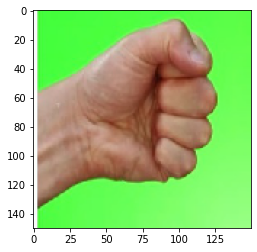

In [32]:
# Criteria: Can predict images uploaded to Colab
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  gambar = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)

  gambar_prediksi = np.vstack([x])
  classes = model_sequential.predict(gambar_prediksi, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('rock')
  elif classes[0,1]!=0:
    print('paper')
  else:
    print('scissors')